# Introduction to Scikit-Learn
This notebook demonstrates some of the most useful functions of the beautiful Scikit-learn library.
What we are going to cover:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. An end-to-end Scikit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
# Create y (labels)
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100) # Create model clf
# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) #test_size = 0.2 nghĩa là 80% data used for training

In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
265,66,1,0,112,212,0,0,132,1,0.1,2,1,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3


In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [11]:
y_train

184    0
204    0
280    0
101    1
107    1
      ..
222    0
219    0
265    0
20     1
189    0
Name: target, Length: 242, dtype: int64

In [12]:
y_test

84     1
283    0
139    1
245    0
275    0
      ..
57     1
240    0
207    0
15     1
157    1
Name: target, Length: 61, dtype: int64

In [13]:
y_preds = clf.predict(X_test) # y prediction
y_preds

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [14]:
# 4. Evaluating the model on the training data and test data
clf.score(X_train,y_train)

1.0

In [15]:
clf.score(X_test,y_test)

0.8032786885245902

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.80      0.80      0.80        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [18]:
confusion_matrix(y_test,y_preds)

array([[25,  6],
       [ 6, 24]], dtype=int64)

In [19]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [20]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("\n")

Trying model with 10 estimators...
Model accuracy on test set: 70.49%


Trying model with 20 estimators...
Model accuracy on test set: 80.33%


Trying model with 30 estimators...
Model accuracy on test set: 75.41%


Trying model with 40 estimators...
Model accuracy on test set: 75.41%


Trying model with 50 estimators...
Model accuracy on test set: 78.69%


Trying model with 60 estimators...
Model accuracy on test set: 73.77%


Trying model with 70 estimators...
Model accuracy on test set: 81.97%


Trying model with 80 estimators...
Model accuracy on test set: 77.05%


Trying model with 90 estimators...
Model accuracy on test set: 80.33%




In [21]:
# 6. Save a model and load it
import pickle

In [22]:
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [23]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8032786885245902

# 1. Getting our data ready to be used with machine learning
Three main things we have to do:

    1. Split the data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing (quy nạp)) or disregarding (loại bỏ) missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split the data into features and labels
X = heart_disease.drop("target",axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# 1.1 Make sure it's all numerical

In [29]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# Split into X/y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]
# Split into traning and test
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

In [33]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model.fit(X_train,y_train)
#model.score(X_test,y_test)

In [34]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformered_X = transformer.fit_transform(X)
transformered_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
pd.DataFrame(transformered_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train,y_test= train_test_split(transformered_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
model.score(X_test,y_test)

0.3235867221569877

## 1.2 What if there were missing value?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data together

In [41]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Coreate X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [44]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [45]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

# Option 1: Fill missing data with Pandas


In [46]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
# Fill the "Doors" column
car_sales_missing["Doors"].fillna("missing",inplace=True)

In [47]:
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformered_X = transformer.fit_transform(X)
transformered_X.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

# Option 2: Fill missing value with Scikit-Learn

In [48]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [49]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [51]:
# Split into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]
# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [52]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [53]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [54]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")
# Define column
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]
# Create a imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])
# Transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [55]:
car_sales_filled_train = pd.DataFrame(filled_X_train,
                               columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_train

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0
...,...,...,...,...
755,Toyota,missing,4.0,218803.0
756,BMW,Blue,5.0,245427.0
757,Toyota,White,4.0,196225.0
758,Honda,Blue,4.0,133117.0


In [56]:
car_sales_filled_test = pd.DataFrame(filled_X_test,
                               columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_test

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0
...,...,...,...,...
185,Honda,Green,4.0,165101.0
186,Nissan,Green,3.0,153554.0
187,Toyota,White,4.0,108569.0
188,BMW,Black,3.0,201190.0


In [57]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [58]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformered_X_train = transformer.fit_transform(car_sales_filled_train)
transformered_X_test = transformer.transform(car_sales_filled_test)
transformered_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [60]:
# Now we have got our data as numbers and filled (no missing dvalue)
# Let's fit a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model.fit(transformered_X_train,y_train)
model.score(transformered_X_test,y_test)

0.21735623151692096

# 2. Choose the right estimator/algorithm for our problems

Some things to note:

- Sklearn refers to machine learning models, algorithms as estimators. 
- Classification problem - predicting a category (heart disease or not)
    - Sometimes you will see `clf` (short for classifier) used as a classification estimator
- Regression problem (Bài toán hồi quy) - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the Sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [61]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [62]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
housing_df["target"] = housing["target"] 
# The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).
# link: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [64]:
# Import algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
# Split into train ans test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create and fit the model (on the training data set)
model = Ridge()
model.fit(X_train,y_train)
# Check the score of the model (on the test set)
model.score(X_test,y_test) # coefficient of determination of the prediction

0.5758549611440126

What if `Ridge` did not work or the score did not fit our needs?

We could try different model.

How about we try ensemble model? (An ensemble is combination of smaller models to try and make better prediction than just single model)

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [65]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
# Setup random seed
np.random.seed(42)
# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
# Split into train ans test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create and fit the model (on the training data set)
model = RandomForestRegressor()
model.fit(X_train,y_train)
# Check the score of the model (on the test set)
model.score(X_test,y_test) # coefficient of determination of the prediction

0.8065734772187598

# 2.2 Picking a machine learning model for a classification problem

Let's go to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [66]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

In [68]:
# Setup random seed
np.random.seed(42)
# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Init linearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)
# Evaluate the LinearSVC
clf.score(X_test,y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [69]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)
# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Init RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
# Evaluate the LinearSVC
clf.score(X_test,y_test)

0.8524590163934426

Note:

1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [70]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3. Fit the model/algorithm on our data and use it to make predictions

## 3.1 Fitting the model to the data

Different names for:

* `X`  = features, features variables, data
* `y` = labels, targets, target variables


In [71]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
# Setup random seed
np.random.seed(42)
# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Init RandomForestClassifier
clf = RandomForestClassifier()
#Fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)
# Evaluate the LinearSVC (use the pattern model has learned)
clf.score(X_test,y_test)

0.8524590163934426

In [72]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# 3.2 Make predictions using a machine learning model

2 ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [74]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
y_preds == y_test

179     True
228    False
111     True
246     True
60      True
       ...  
249     True
104     True
300     True
193     True
184     True
Name: target, Length: 61, dtype: bool

In [78]:
np.mean(y_preds == y_test)

0.8524590163934426

In [79]:
clf.score(X_test,y_test)

0.8524590163934426

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

### Make predictions with `predict_proba()`

In [81]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [82]:
# predict_proba() returns probabilities (xác suất) of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [83]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

### `predict()` can be used for regression models

In [84]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
np.random.seed(42)
# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Create model
model = RandomForestRegressor()
# Fit data to model
model.fit(X_train, y_train)
# Make predictions
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [87]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [88]:
len(y_preds), len(y_test)

(4128, 4128)

In [89]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

# 4. Evaluating a model

Three ways to evaluate Scikit-Learn models/estimators:

1. Extimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [90]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Create the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Create model
clf = RandomForestClassifier()
# Fit data to model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
# The highest value for the score() method is 1.0, the lowest is 0.0
clf.score(X_train,y_train)

1.0

In [92]:
clf.score(X_test,y_test)

0.8524590163934426

### let's use the `score()` on our regression problem

In [93]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Create model
model = RandomForestRegressor()
# Fit data to model
model.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 1.0
model.score(X_test,y_test)

0.8065734772187598

### 4.2 Evaluating a model with the `scoring` method

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Create the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Create model
clf = RandomForestClassifier()
# Fit data to model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
clf.score(X_test,y_test)

0.8524590163934426

In [97]:
cross_val_score(clf,X,y) #cv default = 5

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [98]:
cross_val_score(clf,X,y,cv=10) 

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [99]:
np.random.seed(42)
# Single traning and test split score
clf_single_score = clf.score(X_test,y_test) # Default scoring parameter of classifier = mean accuracy
# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))
# Compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [100]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [101]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y)

In [103]:
np.mean(cross_val_score)

0.8248087431693989

In [104]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under the receive operating characteristic curve (AUC/ROC)

- Area under curve (AUC)
- ROC curve

ROC curve are a comparison of a model's `true positive rate (tpr)` versus a models `false positive rate (fpr)`
- True positive → model predicts 1 while truth is 1
- False positive → model predicts 1 while truth is 0
- True negative → model predicts 0 while truth is 0
- False negative → model predicts 0 while truth is 1

In [105]:
# Create X_test, y_test, etc
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.metrics import roc_curve
# Fit the classifier
clf.fit(X_train,y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [106]:
y_probs_positive = y_probs[:,1] # slicing → get column 1
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [107]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)
# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

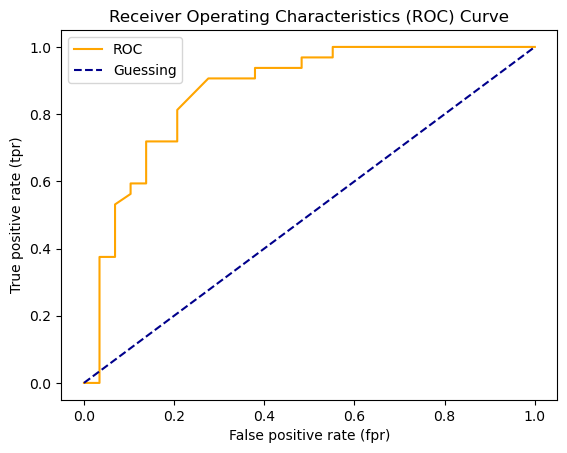

In [108]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of model.
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [109]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

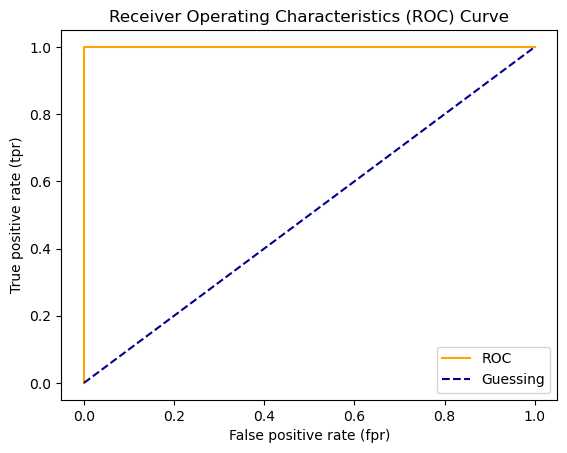

In [110]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [111]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused
(Ma trận nhầm lẫn là một cách nhanh chóng để so sánh các nhãn mà một mô hình dự đoán và các nhãn thực tế mà nó dự đoán. Về bản chất, cung cấp cho bạn ý tưởng về nơi mô hình đang bị nhầm lẫn.)

In [112]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [113]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


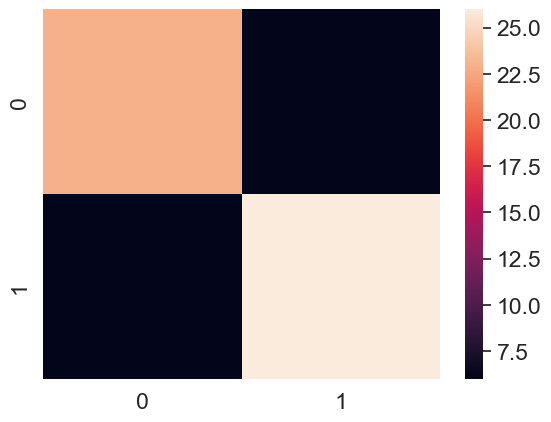

In [114]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns
# Set the font scale
sns.set(font_scale=1.5)
# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
# Plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-Learn
To use the new methods of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+

In [115]:
import sklearn

sklearn.__version__

'1.0.2'

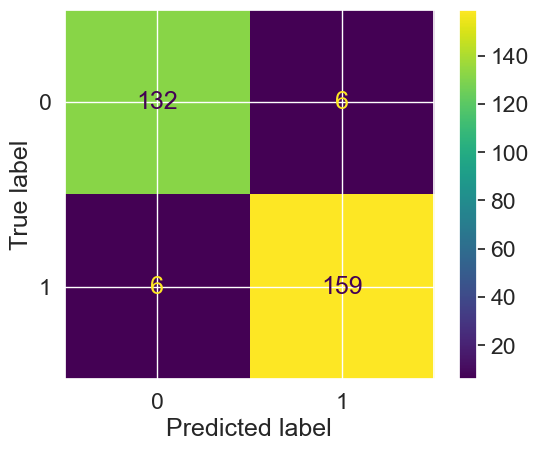

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y);

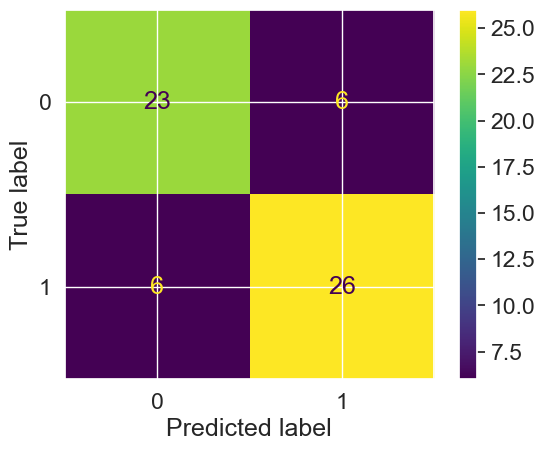

In [117]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds);

### Classification Report

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [119]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case
disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True,
                                  zero_division=0))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize classification metrics:

- <strong>Accuracy</strong> is a good measure to start with if all classes are balanced.
- <strong>Precision and recall</strong> become more important when classes are imbalanced.
    - If `false positive` predictions are worse than `false negatives`, aim for higher precision (độ chính xác cao hơn).
    - If `false negative` predictions are worse than `false positives`, aim for higher recall.
- <strong>F1-score</strong> is a combination of precision and recall
 

### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover are:

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_test,y_test)

RandomForestRegressor()

In [124]:
model.score(X_test,y_test)

0.9652739672763454

In [125]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [126]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [127]:
y_test.mean()

2.0550030959302275

In [128]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [130]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [131]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)

0.0

In [132]:
r2_score(y_true=y_test,
        y_pred=y_test)

1.0